# Work Space

Sets up a clean Python workbook with all needed initialization code. The `groupstat` function is provided along with the code for side-by-side boxplots. This notebook includes:

- datascience package imported
- numpy imported (np is the alias)
- scipy.stats imported (stats is the alias)

## Initialization Code Block

In [31]:
## Do not change this cell, only execute it. 
## This cell initializes Python so that datascience, numpy and scipy packages are ready to use.

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import scipy.stats as stats

from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide/Show Code (Too Advanced or Not the Point)"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def hide_code():
    display(HTML(toggle_code_str))

In [32]:
## Read in a CSV file from UNG data hub.

births = Table.read_table('baby.csv')

## Read in a CSV data file from the web.

pers = Table.read_table('http://faculty.ung.edu/rsinn/personality.csv')

## The `groupstats` function

In [33]:
## Do not change this cell, only execute it. 
## This cell creates the function `groupstats` which provides descriptive statistics  
##     on a numeric variable for each level of a grouping variable.

def groupstats(table, group, data):
    ### This function will find all the major descriptive stats you need ###
    cut = table.select(group, data).sort(group)
    favstats = cut.group(group, np.mean).sort(group)
    words = [data, 'mean']
    favstats = favstats.relabeled(' '.join(words), "mean")
    groups = favstats.column(0)
    q1=make_array()
    for i in np.arange(len(groups)):
        q1 = np.append(q1, np.percentile(table.where(group, groups.item(i)).column(data), 25))
    q3=make_array()
    for i in np.arange(len(groups)):
        q3 = np.append(q3, np.percentile(table.where(group, groups.item(i)).column(data), 75))
    favstats = favstats.with_column('std', cut.group(group, stats.tstd).sort(group).column(1) )
    favstats = favstats.with_column('min', cut.group(group, min).sort(group).column(1) )
    favstats = favstats.with_column('Q1', q1 )
    favstats = favstats.with_column('median', cut.group(group, np.median).sort(group).column(1) )
    favstats = favstats.with_column('Q3', q3 )
    favstats = favstats.with_column('max', cut.group(group, max).sort(group).column(1) )
    favstats = favstats.with_column('IQR', cut.group(group, stats.iqr).sort(group).column(1) )
    favstats = favstats.with_column('n', cut.group(group ).sort(group).column(1) )
    return favstats


from hide_code3 import hide_code

hide_code()

## Code to create side-by-side boxplots

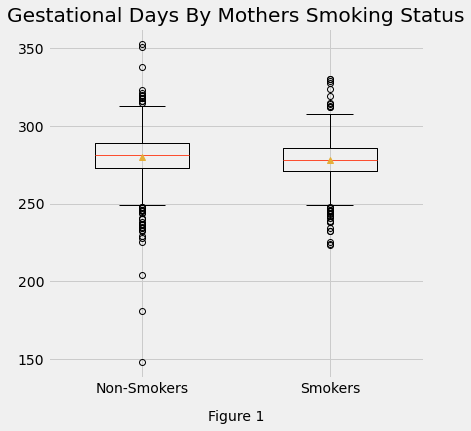

In [34]:
## Demo: how to make side-by-side boxplots for two groups. 
## Copy this cell and only change the next four lines

group1 = births.where('Maternal Smoker', False).column("Gestational Days")  # Change to data for first group
group2 = births.where('Maternal Smoker', True).column("Gestational Days") # Change to data for second group
labels = make_array("Non-Smokers", "Smokers")  # Change to appropriate labels
my_title = "Gestational Days By Mothers Smoking Status"  # Change to your title

## Make no changes below here but do copy

ticks=make_array(2.5, 3.5)  
plots.figure(figsize=(6, 6))
plots.boxplot(group1, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(group2, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.xticks(ticks, labels)
plots.title(my_title)
plots.text(3, 110,"Figure 1", ha='center'); 

hide_code()

## Start working in code blocks below.